In [151]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [2]:
con_df = pd.read_csv('./conversion_data.csv')

In [32]:
con_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [33]:
con_df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [41]:
con_df[con_df['age'].apply(lambda x: x > 80)]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [72]:
sorted(con_df['age'].unique(), reverse=True)

[79,
 77,
 73,
 72,
 70,
 69,
 68,
 67,
 66,
 65,
 64,
 63,
 62,
 61,
 60,
 59,
 58,
 57,
 56,
 55,
 54,
 53,
 52,
 51,
 50,
 49,
 48,
 47,
 46,
 45,
 44,
 43,
 42,
 41,
 40,
 39,
 38,
 37,
 36,
 35,
 34,
 33,
 32,
 31,
 30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17]

In [71]:
con_df = con_df[con_df['age'].apply(lambda x : x < 80)]

In [76]:
cmc = con_df.groupby('country')['converted'].mean().reset_index()

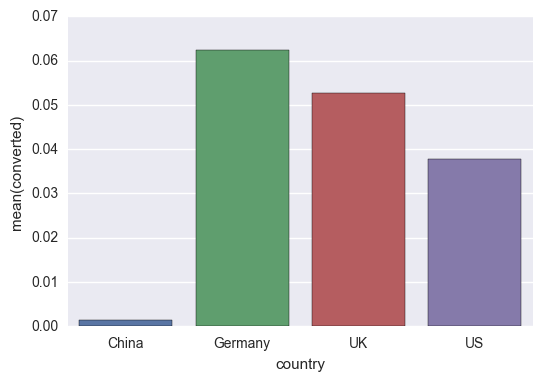

In [90]:
sns.barplot(x = cmc['country'], y = cmc['converted'], data=cmc)

In [103]:
cmp = con_df.groupby('total_pages_visited')['converted'].mean()

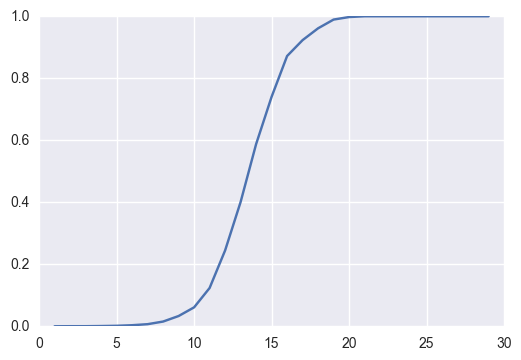

In [104]:
plt.plot(cmp)

In [105]:
cmp

total_pages_visited
1     0.000000
2     0.000228
3     0.000251
4     0.000780
5     0.001570
6     0.003437
7     0.006769
8     0.015238
9     0.033067
10    0.061068
11    0.123471
12    0.244537
13    0.400825
14    0.587521
15    0.740181
16    0.871818
17    0.923077
18    0.961219
19    0.989381
20    0.997531
21    1.000000
22    1.000000
23    1.000000
24    1.000000
25    1.000000
26    1.000000
27    1.000000
28    1.000000
29    1.000000
Name: converted, dtype: float64

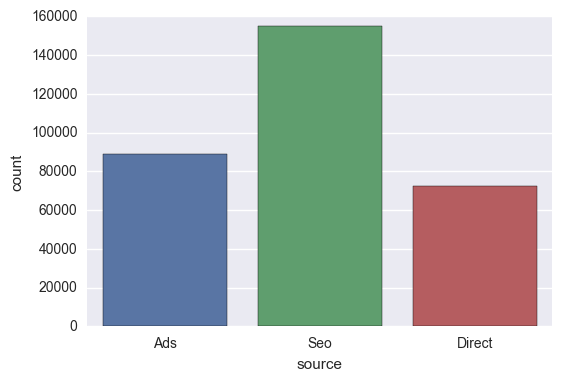

In [106]:
sns.countplot(x='source', data=con_df)

In [111]:
cms = con_df.groupby('source')['converted'].mean().reset_index()

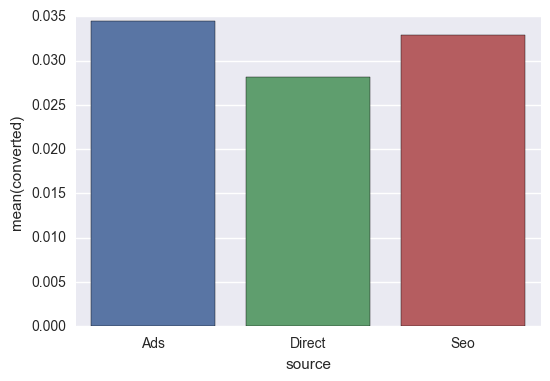

In [113]:
sns.barplot(x='source', y='converted' , data=cms)

In [114]:
cmsp = con_df.groupby('source')['total_pages_visited'].sum()

In [115]:
cmsp

source
Ads       434775
Direct    348840
Seo       757192
Name: total_pages_visited, dtype: int64

In [ ]:
con_dum = pd.get_dummies(con_df)

In [136]:
X = con_dum.drop('converted',1)
y = con_dum['converted']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [138]:
lr = LogisticRegression()

In [139]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [140]:
y_pred = lr.predict(X_test)

In [143]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     61273
          1       0.84      0.68      0.75      1967

avg / total       0.99      0.99      0.99     63240

[[61027   246]
 [  627  1340]]


In [144]:
print metrics.accuracy_score(y_test, y_pred)


0.98619544592


In [145]:
X_train

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
219872,22,0,9,1.0,0.0,0.0,0.0,0.0,1.0,0.0
302878,25,1,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0
304288,28,1,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0
210287,27,0,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0
289712,23,1,5,0.0,0.0,0.0,1.0,0.0,1.0,0.0
157905,36,1,6,1.0,0.0,0.0,0.0,1.0,0.0,0.0
296847,49,0,5,0.0,0.0,0.0,1.0,1.0,0.0,0.0
197423,41,1,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0
100065,20,0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0
313077,51,1,3,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [148]:
print(lr.coef_)

[[-0.07639567 -1.69106995  0.75801166 -3.79091481 -0.07927445 -0.29760939
  -0.66778862 -1.52905045 -1.74239238 -1.56414444]]


In [152]:
feat_importances = pd.DataFrame({"name":X_train.columns,"coef":lr.coef_[0]})
feat_importances = feat_importances[['name','coef']]# reorder the columns
feat_importances['importances'] = np.abs( feat_importances['coef'] )
feat_importances.sort_values(by="importances",inplace=True,ascending=False)
feat_importances

,name,coef,importances
3,country_China,-3.790915,3.790915
8,source_Direct,-1.742392,1.742392
1,new_user,-1.691070,1.691070
9,source_Seo,-1.564144,1.564144
7,source_Ads,-1.529050,1.529050
2,total_pages_visited,0.758012,0.758012
6,country_US,-0.667789,0.667789
5,country_UK,-0.297609,0.297609
4,country_Germany,-0.079274,0.079274
0,age,-0.076396,0.076396
